In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting the path of data
dir_data = './Day2data/'
train = os.path.join(dir_data, 'application_train.csv')
train_data = pd.read_csv(train)
train_data["CNT_CHILDREN"].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [2]:
# 1 : based on CNT_CHILDREN to generate 4 groups 

cut_rule = [-0.1, 0 ,2,5,20]
group_names = ['0 個小孩', '有 1 - 2 個小孩', '有 3 - 5 個小孩', '有超過 5 個小孩']

train_data['CNT_CHILDREN_GROUP'] = pd.cut(train_data['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels = group_names)
train_data['CNT_CHILDREN_GROUP'].value_counts()

0 個小孩          215371
有 1 - 2 個小孩     87868
有 3 - 5 個小孩      4230
有超過 5 個小孩          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [3]:
# 2-1  based on TARGET and CNT_CHILDREN to generate sub dataframe


grp = ['TARGET', 'CNT_CHILDREN_GROUP']
grouped_df = train_data.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.describe()

count           mean           std      min  \
TARGET CNT_CHILDREN_GROUP                                                   
0      0 個小孩               198762.0  166747.010980  1.061799e+05  25650.0   
       有 1 - 2 個小孩          80081.0  174590.584401  1.201981e+05  26550.0   
       有 3 - 5 個小孩           3810.0  175053.742913  1.128427e+05  29250.0   
       有超過 5 個小孩               33.0  139159.090909  7.112483e+04  45000.0   
1      0 個小孩                16609.0  160804.210548  8.483011e+04  25650.0   
       有 1 - 2 個小孩           7787.0  176115.362720  1.327159e+06  27900.0   
       有 3 - 5 個小孩            420.0  160677.385714  1.130315e+05  36000.0   
       有超過 5 個小孩                9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
TARGET CNT_CHILDREN_GROUP                                             
0      0 個小孩               112500.0  144000.0  202500.0   13500000.0  
       有 1 - 2 個小孩         112500.0  157500.0  211500.0   18000090.0  
       有 3 - 5 個小孩         112500.0  157500.0  202500.0    2250000.0  
       有超過 5 個小孩            90000.0  112500.0  180000.0     337500.0  
1      0 個小孩               112500.0  135000.0  202500.0    1890000.0  
       有 1 - 2 個小孩         112500.0  135000.0  202500.0  117000000.0  
       有 3 - 5 個小孩          96750.0  135000.0  185625.0    1350000.0  
       有超過 5 個小孩           135000.0  180000.0  202500.0     315000.0

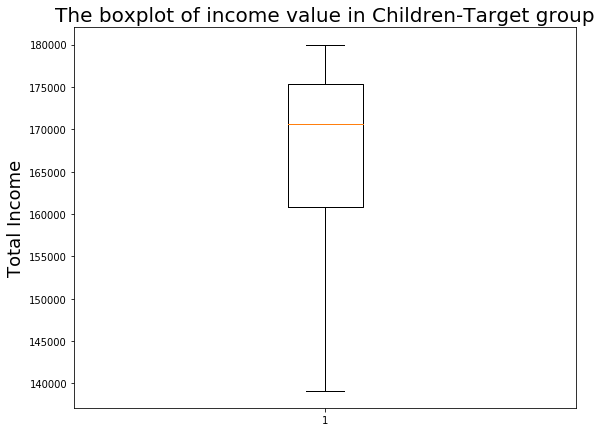

In [4]:
# 2-2 to generate a box plot the describe the mean value distributiion

plt.figure(figsize=(9,7))
plt.boxplot(grouped_df.mean())
plt.ylabel("Total Income",fontsize='18')
plt.title("The boxplot of income value in Children-Target group", fontsize = '20')
plt.show()

In [5]:
# group1 = train_data[train_data['CNT_CHILDREN_GROUP'] == ['0 個小孩']]
# group2 = train_data[train_data['CNT_CHILDREN_GROUP'] == ['有 1 - 2 個小孩']]
# group3 = train_data[train_data['CNT_CHILDREN_GROUP'] == ['有 3 - 5 個小孩']]
# group4 = train_data[train_data['CNT_CHILDREN_GROUP'] == ['有超過 5 個小孩']]
# group1.describe()
# group2.describe()
# group3.describe()
# group4.describe()

In [6]:
# 3 to calculate the z score

train_data['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())
train_data[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
